In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
# Membaca data dari file excel
df = pd.read_excel('Biak Numfor Clean.xlsx', index_col='Date')

In [ ]:
# Menampilkan data 5 baris pertama
df.head()

,Tn,Tx,RH_avg,RR,ss,ff_x,ddd_x
Date,,,,,,,
2010-01-01,25.0,29.8,88,16.6,2.4,4,180
2010-01-02,24.0,30.8,88,16.6,4.8,4,180
2010-01-03,25.0,31.1,88,30.9,5.8,4,315
2010-01-04,24.0,31.6,87,5.0,4.8,5,315
2010-01-05,21.0,30.8,87,0.3,5.8,4,315


In [ ]:
# Menghapus variabel yang tidak digunakan
df2 = df.drop(['ss'], axis=1)

In [ ]:
# Menampilkan deskripsi statistik dari dataset
df2.describe()

,Tn,Tx,RH_avg,RR,ff_x,ddd_x
count,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000
mean,24.556001,30.345562,86.606492,9.327069,5.193148,195.412142
std,0.890441,1.122961,4.381715,14.778500,1.708039,106.409292
min,20.900000,23.200000,68.000000,0.000000,0.000000,0.000000
25%,24.000000,29.800000,84.000000,0.300000,4.000000,100.000000
50%,24.800000,30.500000,87.000000,3.300000,5.000000,240.000000
75%,25.000000,31.200000,90.000000,11.650000,6.000000,280.000000
max,28.800000,35.000000,99.000000,147.200000,16.000000,360.000000


In [ ]:
# Korelasi
df2.corr()

,Tn,Tx,RH_avg,RR,ff_x,ddd_x
Tn,1.000000,0.207741,-0.219367,-0.328250,0.048307,-0.034624
Tx,0.207741,1.000000,-0.506683,-0.185292,0.127036,-0.077128
RH_avg,-0.219367,-0.506683,1.000000,0.201351,-0.202637,0.002819
RR,-0.328250,-0.185292,0.201351,1.000000,0.055860,0.004205
ff_x,0.048307,0.127036,-0.202637,0.055860,1.000000,-0.018349
ddd_x,-0.034624,-0.077128,0.002819,0.004205,-0.018349,1.000000


In [ ]:
# Mengatur tampilan gambar
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

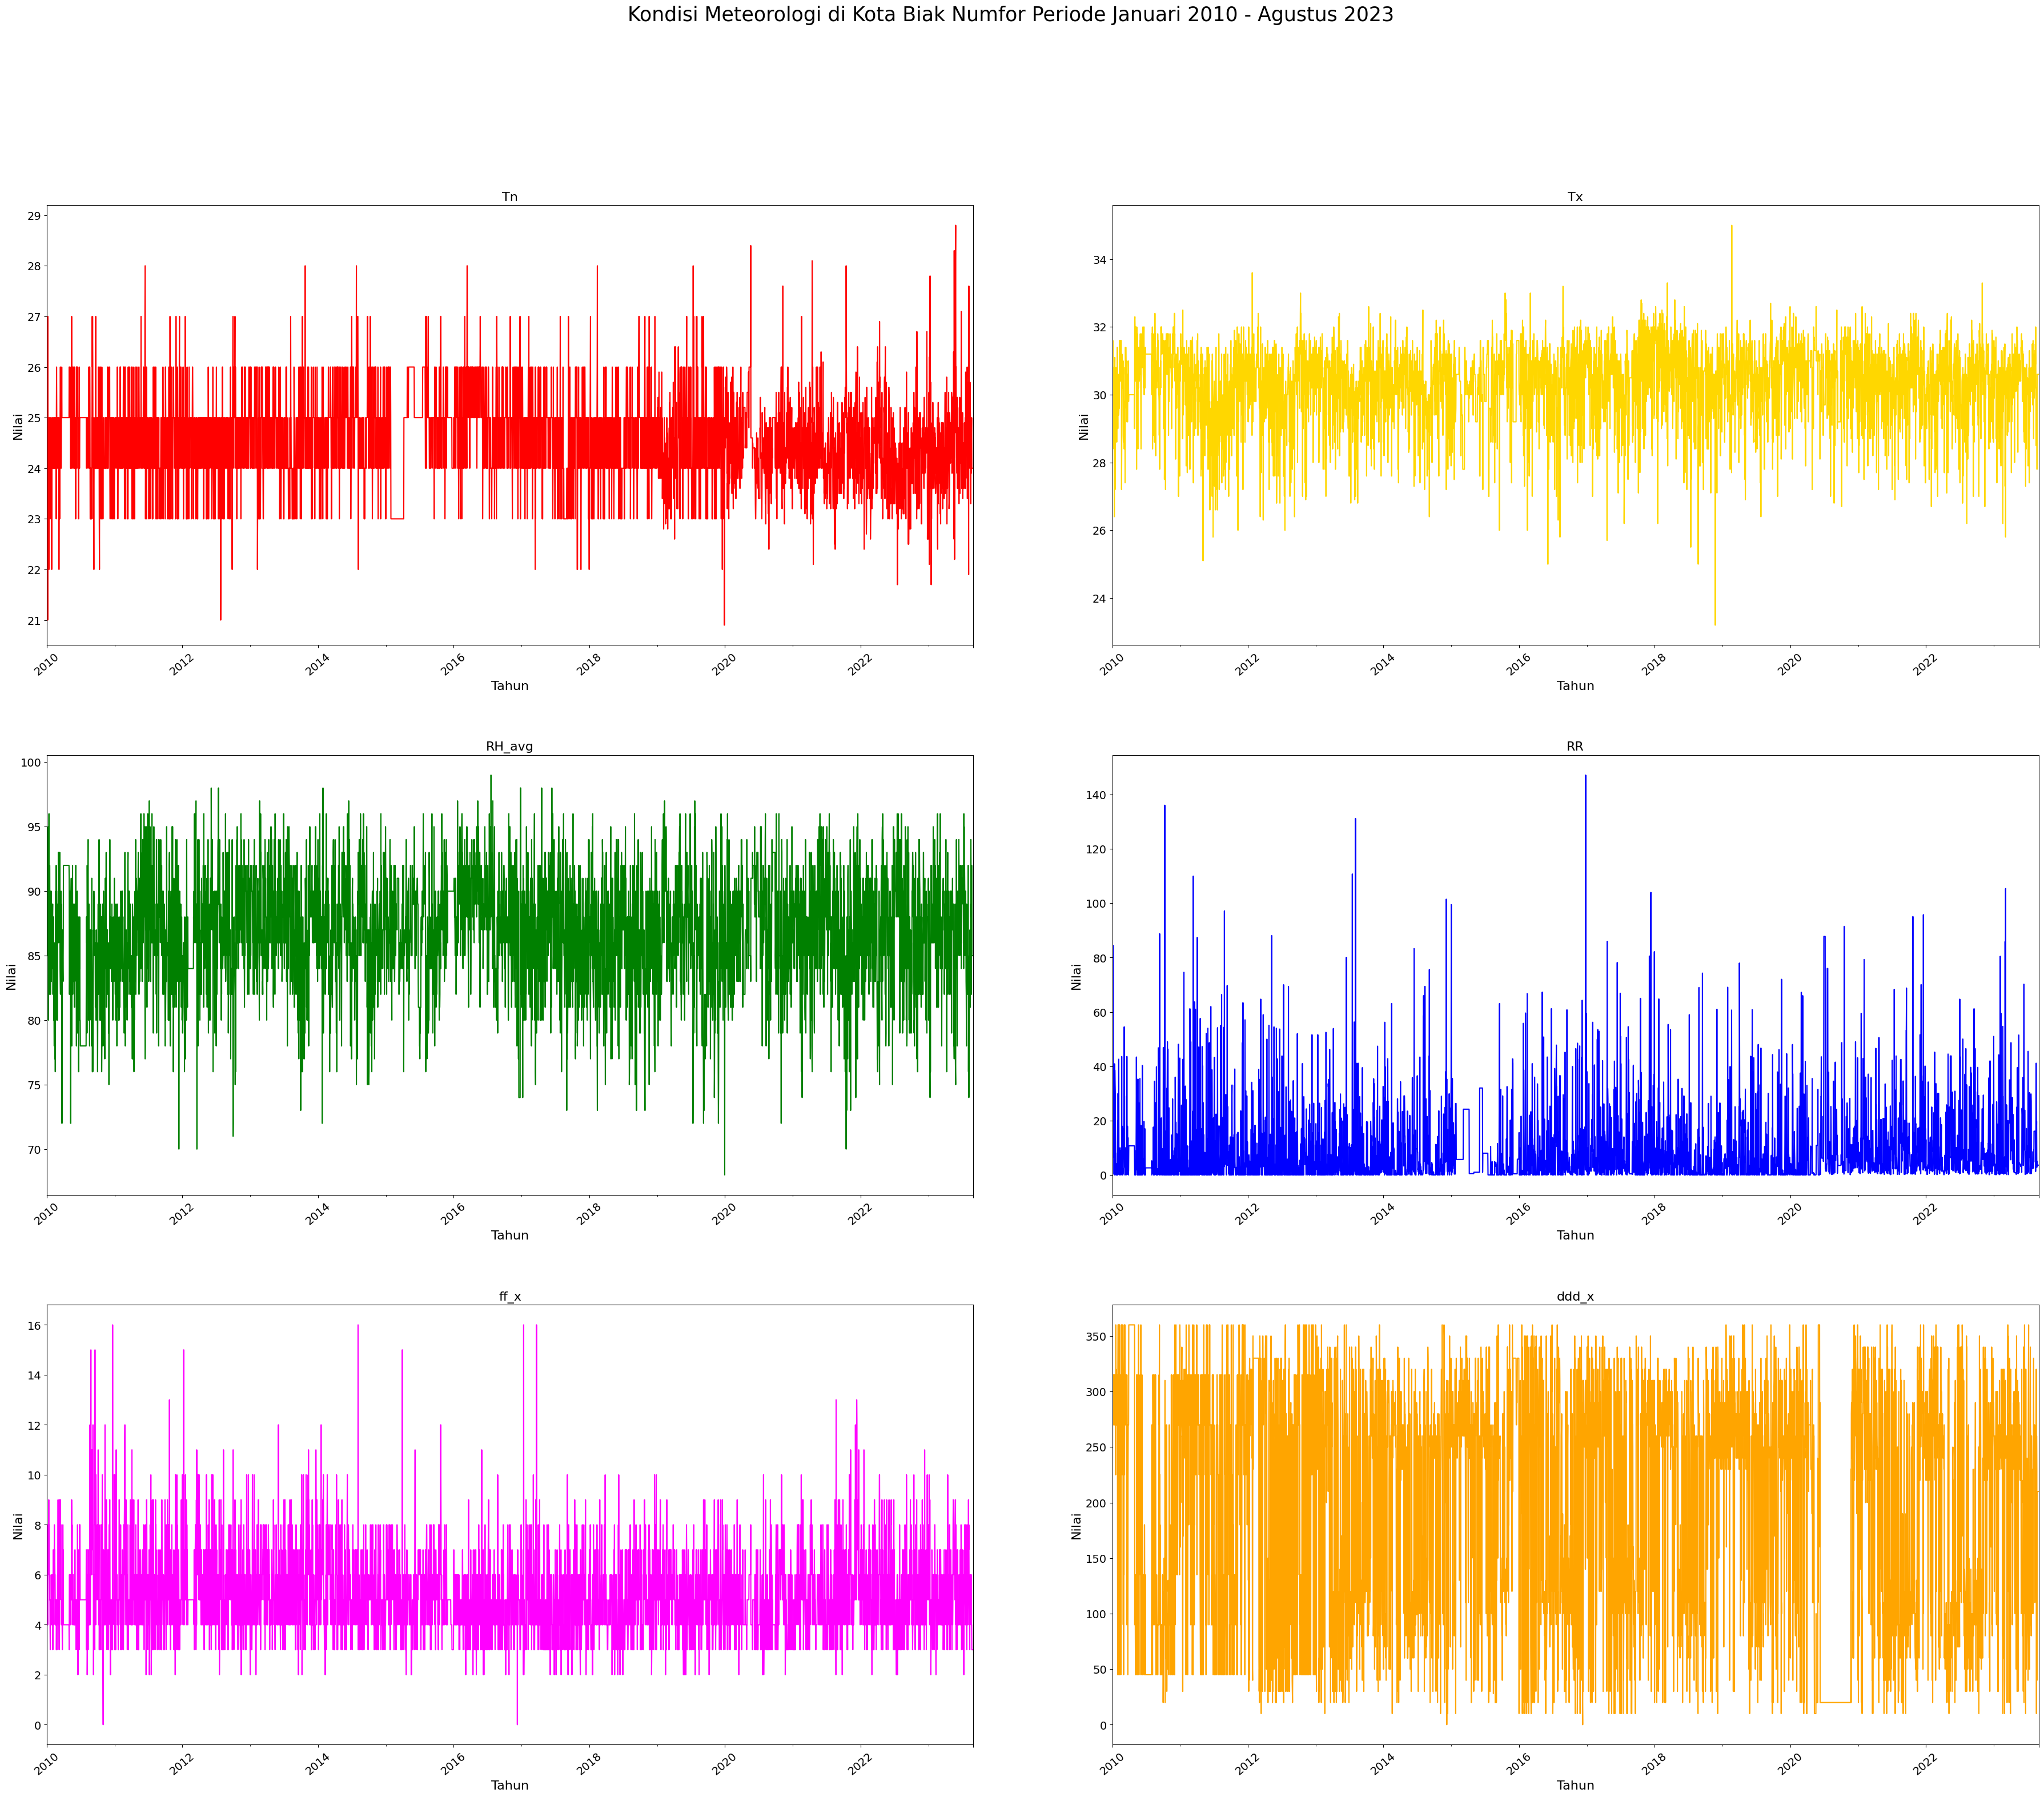

In [ ]:
# Melakukan analisis trend
npar = df2.columns
upar = npar.unique()
colors = ['crimson', 'red', 'gold', 'green', 'blue', 'magenta', 'orange', 'chocolate', 'silver', 'cyan', 'sienna']
plt.figure(figsize=(45,35))
plt.subplots_adjust(wspace=0.15, hspace=0.25)
plt.suptitle('Kondisi Meteorologi di Kota Biak Numfor Periode Januari 2010 - Agustus 2023', fontsize=25)
j=1
for i in npar:
  plt.subplot(3, 2, j)
  df2[i].plot(color=colors[j])

  plt.title(i, fontsize=16)
  plt.xlabel('Tahun')
  plt.ylabel('Nilai')
  plt.xticks(rotation=40, fontsize=14)
  j=j+1

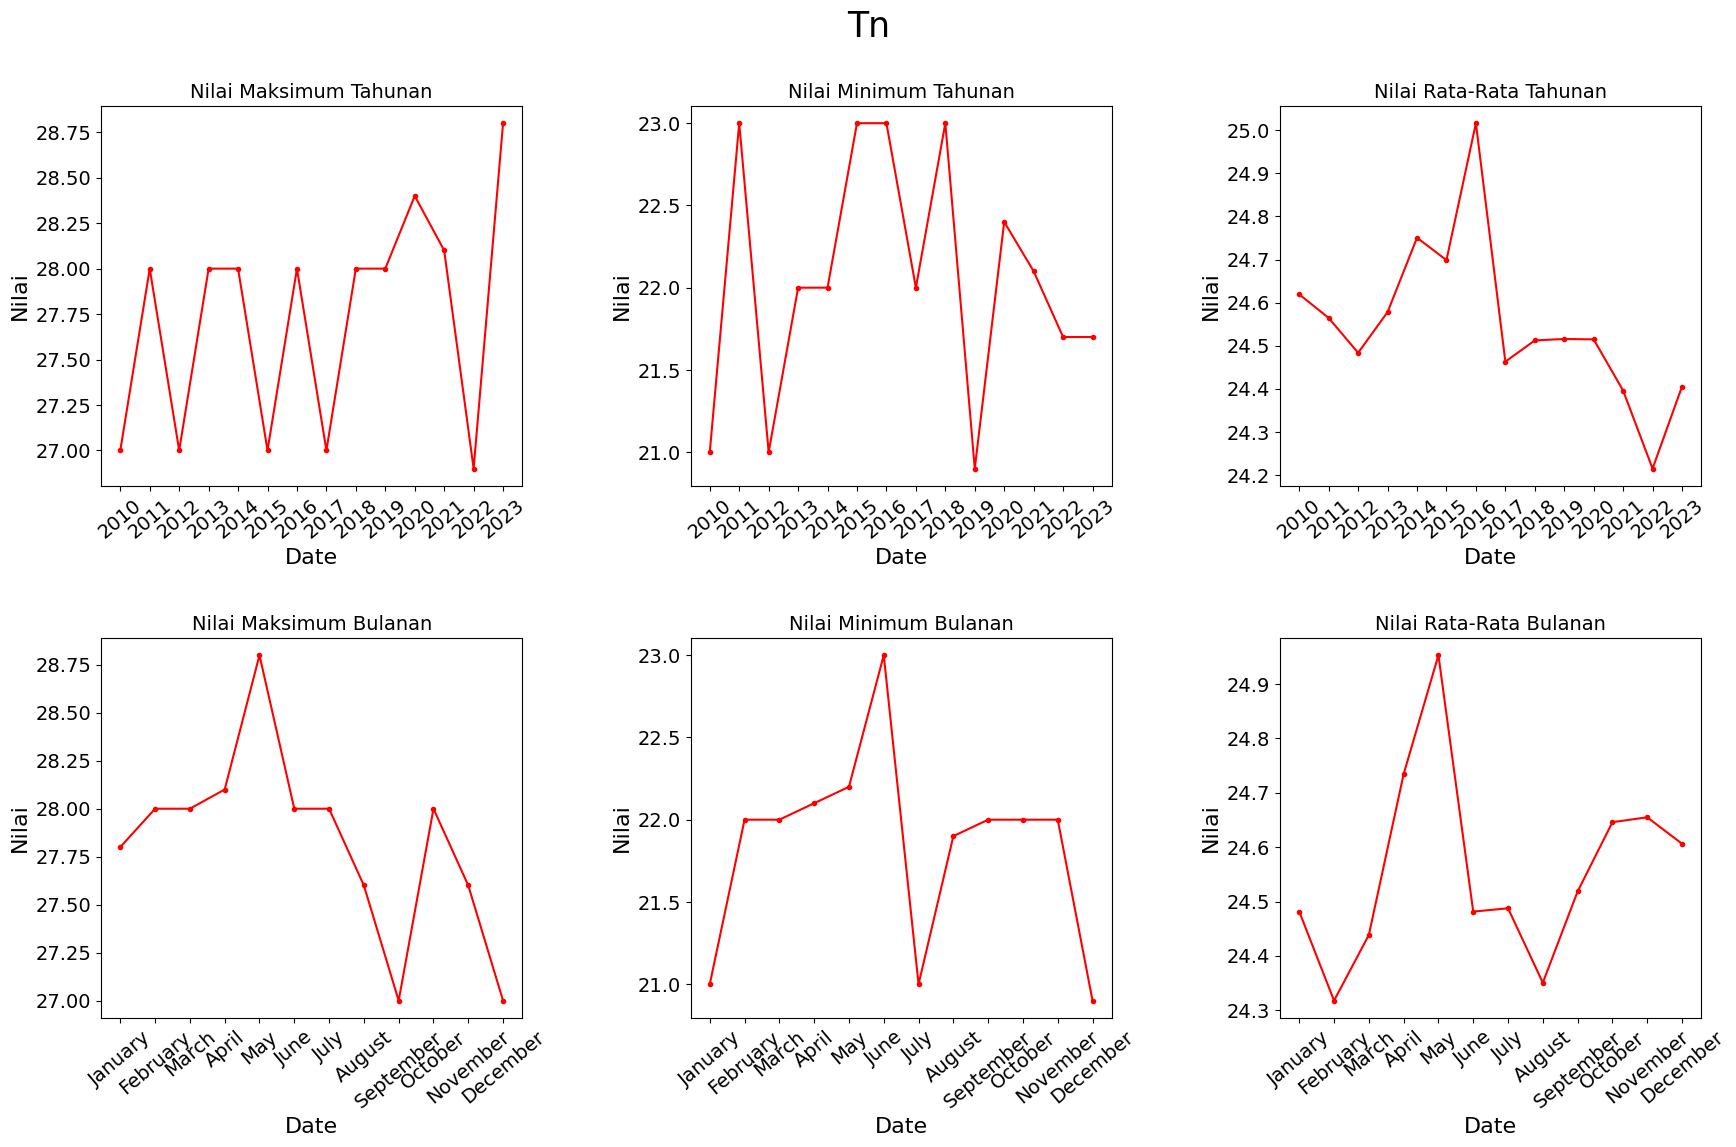

In [ ]:
# Temperatur Minimum
# Menampilkan plot trend tahunan
var = 'Tn'
c = 'red'
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2.6,
                    top=2,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2, 3, 1)
dfy1 = df.groupby(df.index.year)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Maksimum Tahunan')


plt.subplot(2, 3, 2)
dfy1 = df.groupby(df.index.year)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Minimum Tahunan')


plt.subplot(2, 3, 3)
dfy1 = df.groupby(df.index.year)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Rata-Rata Tahunan')

# Menampilkan plot trend bulanan

plt.subplot(2, 3, 4)
dfy1 = df.groupby(df.index.month)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Maksimum Bulanan')

plt.subplot(2, 3, 5)
dfy1 = df.groupby(df.index.month)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Minimum Bulanan')

plt.subplot(2, 3, 6)
dfy1 = df.groupby(df.index.month)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Rata-Rata Bulanan')
plt.suptitle(var, x=1.3, y=2.2, fontsize=25)
plt.show()

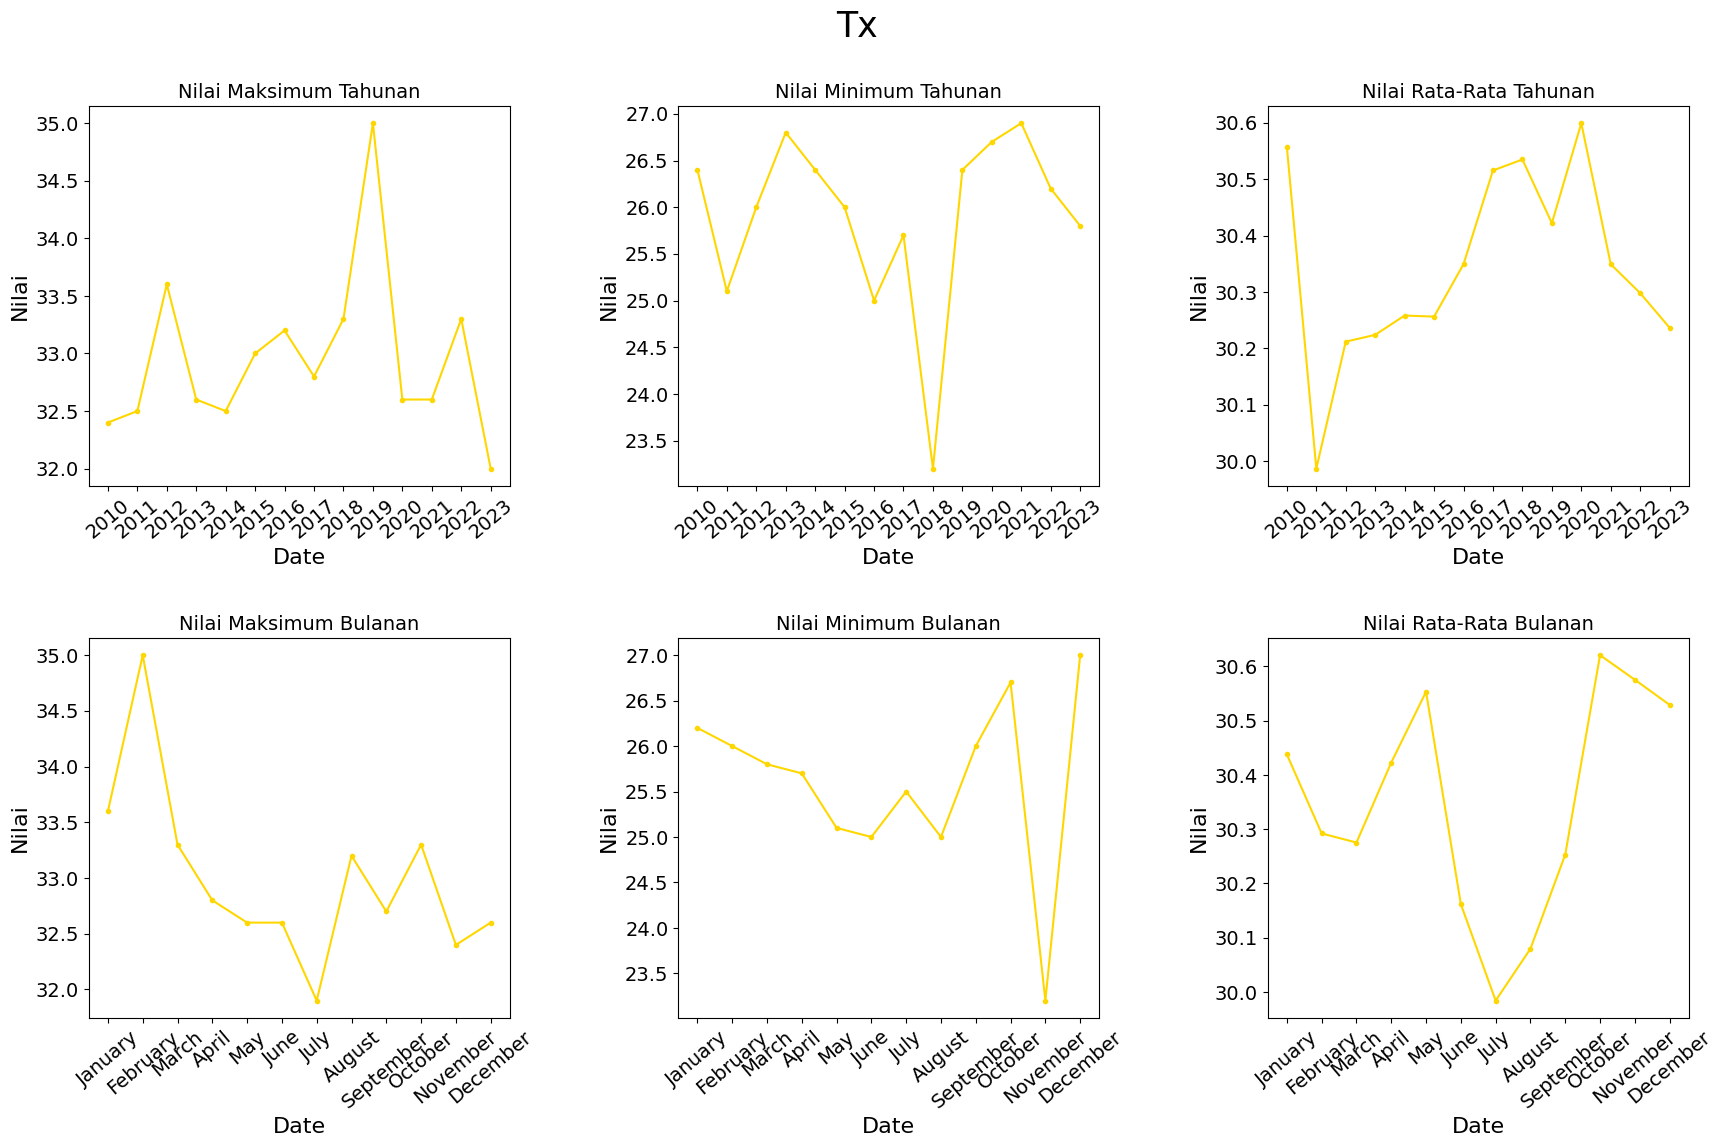

In [ ]:
# Temperatur Maksimum
# Menampilkan plot trend tahunan
var = 'Tx'
c = 'gold'
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2.6,
                    top=2,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2, 3, 1)
dfy1 = df.groupby(df.index.year)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Maksimum Tahunan')


plt.subplot(2, 3, 2)
dfy1 = df.groupby(df.index.year)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Minimum Tahunan')


plt.subplot(2, 3, 3)
dfy1 = df.groupby(df.index.year)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Rata-Rata Tahunan')

# Menampilkan plot trend bulanan

plt.subplot(2, 3, 4)
dfy1 = df.groupby(df.index.month)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Maksimum Bulanan')

plt.subplot(2, 3, 5)
dfy1 = df.groupby(df.index.month)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Minimum Bulanan')

plt.subplot(2, 3, 6)
dfy1 = df.groupby(df.index.month)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Rata-Rata Bulanan')
plt.suptitle(var, x=1.3, y=2.2, fontsize=25)
plt.show()

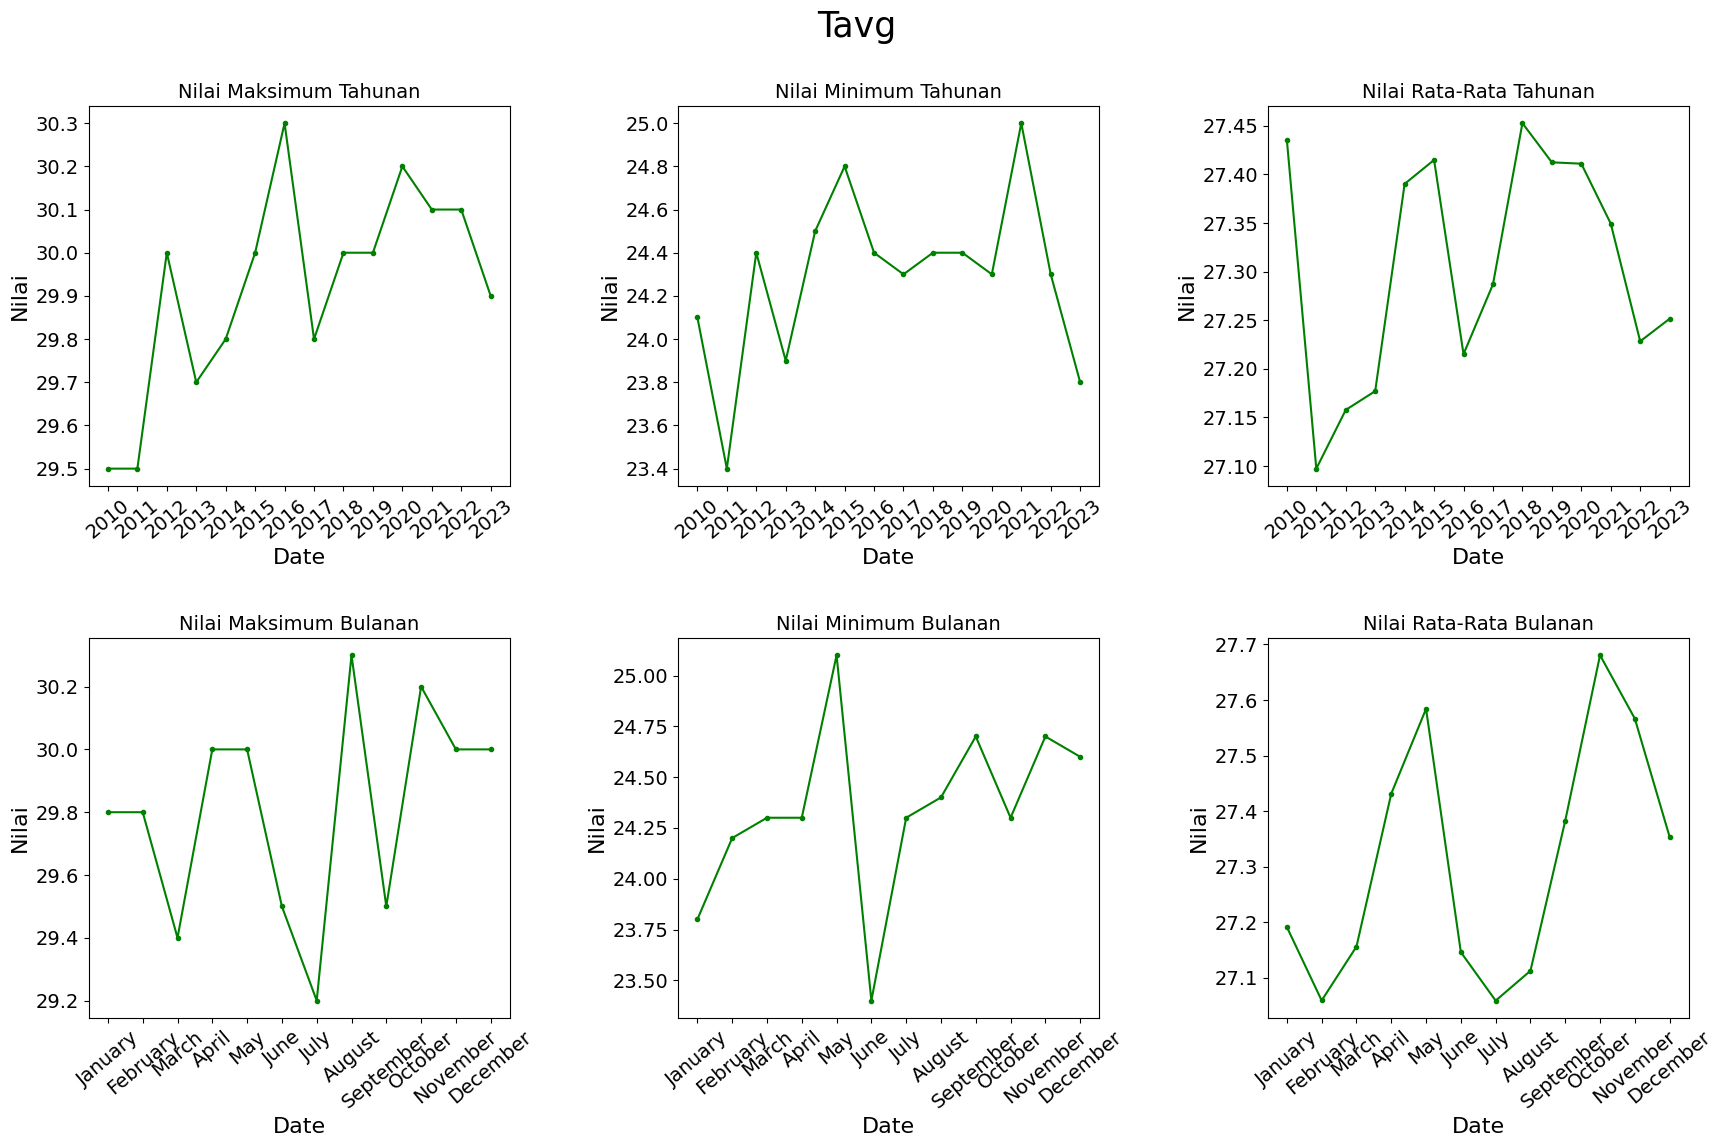

In [ ]:
# Temperatur Rata-Rata
# Menampilkan plot trend tahunan
var = 'Tavg'
c = 'green'
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2.6,
                    top=2,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2, 3, 1)
dfy1 = df.groupby(df.index.year)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Maksimum Tahunan')


plt.subplot(2, 3, 2)
dfy1 = df.groupby(df.index.year)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Minimum Tahunan')


plt.subplot(2, 3, 3)
dfy1 = df.groupby(df.index.year)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Rata-Rata Tahunan')

# Menampilkan plot trend bulanan

plt.subplot(2, 3, 4)
dfy1 = df.groupby(df.index.month)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Maksimum Bulanan')

plt.subplot(2, 3, 5)
dfy1 = df.groupby(df.index.month)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Minimum Bulanan')

plt.subplot(2, 3, 6)
dfy1 = df.groupby(df.index.month)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Rata-Rata Bulanan')
plt.suptitle(var, x=1.3, y=2.2, fontsize=25)
plt.show()

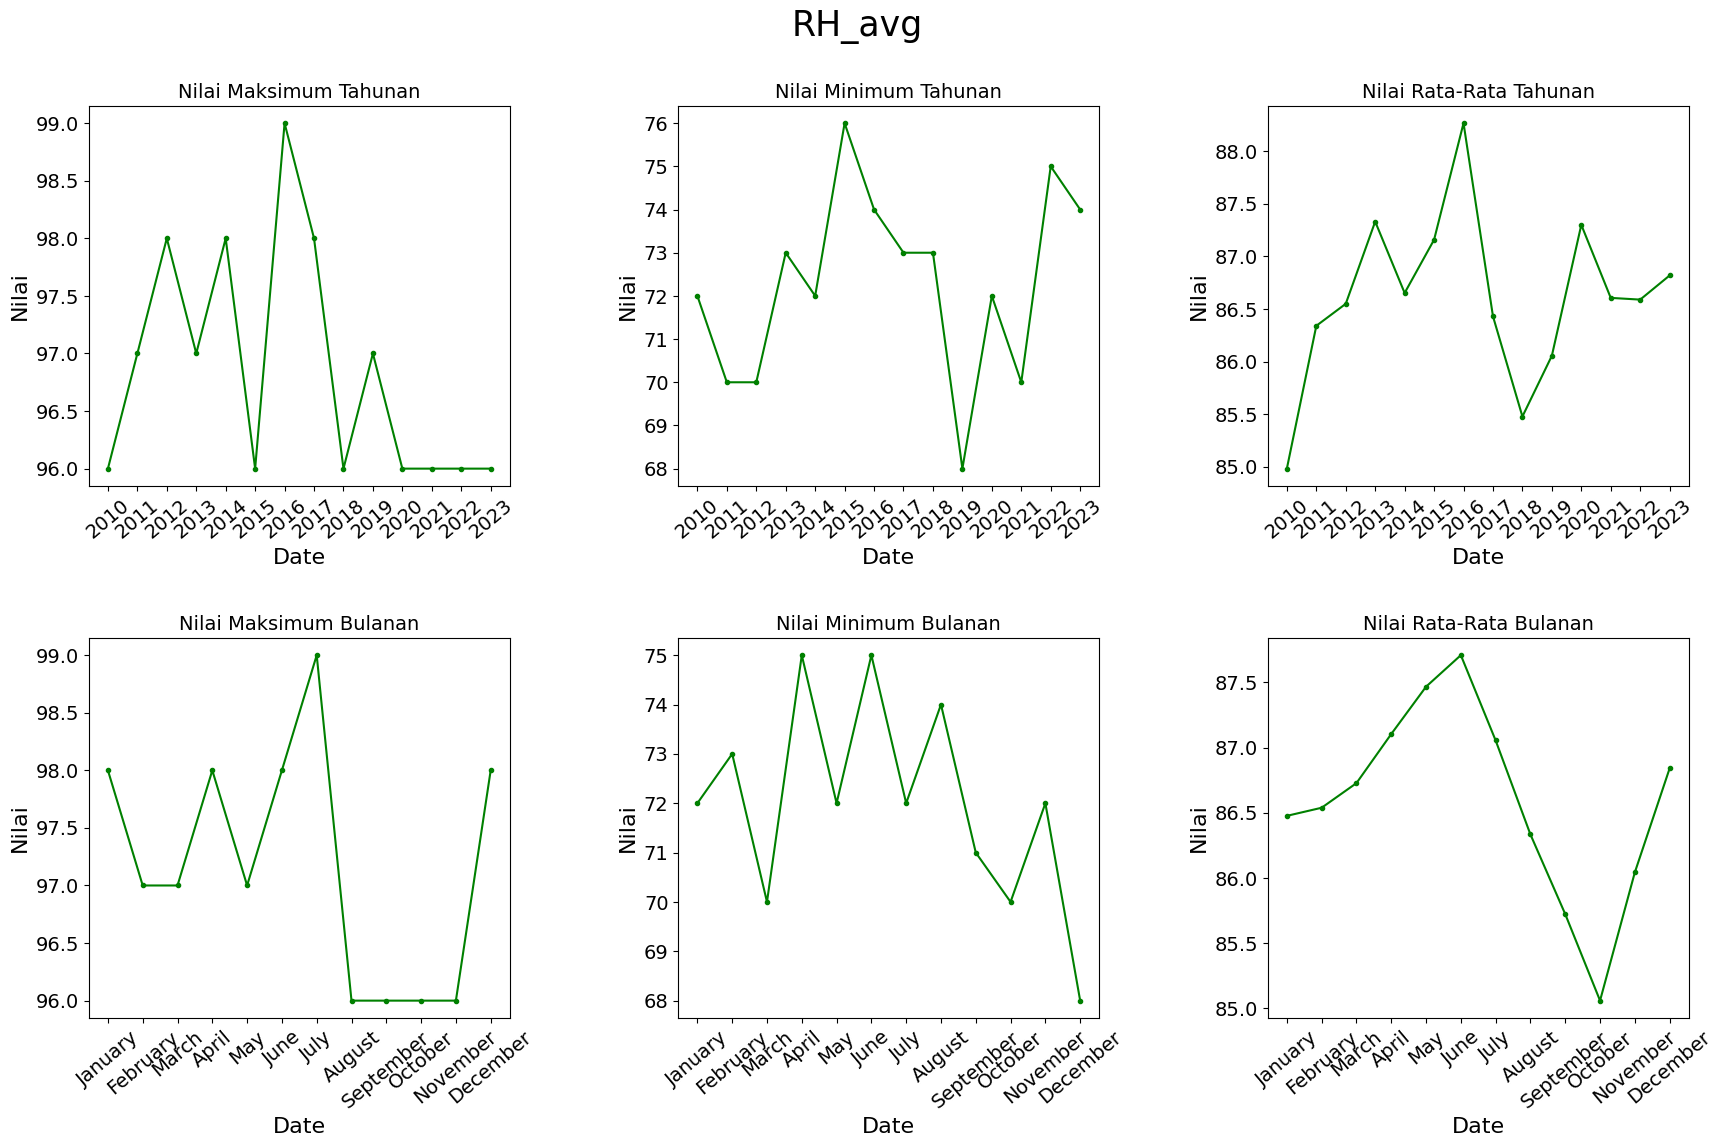

In [ ]:
# Kelembapan Rata-Rata
# Menampilkan plot trend tahunan
var = 'RH_avg'
c = 'green'
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2.6,
                    top=2,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2, 3, 1)
dfy1 = df.groupby(df.index.year)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Maksimum Tahunan')


plt.subplot(2, 3, 2)
dfy1 = df.groupby(df.index.year)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Minimum Tahunan')


plt.subplot(2, 3, 3)
dfy1 = df.groupby(df.index.year)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Rata-Rata Tahunan')

# Menampilkan plot trend bulanan

plt.subplot(2, 3, 4)
dfy1 = df.groupby(df.index.month)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Maksimum Bulanan')

plt.subplot(2, 3, 5)
dfy1 = df.groupby(df.index.month)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Minimum Bulanan')

plt.subplot(2, 3, 6)
dfy1 = df.groupby(df.index.month)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Rata-Rata Bulanan')
plt.suptitle(var, x=1.3, y=2.2, fontsize=25)
plt.show()

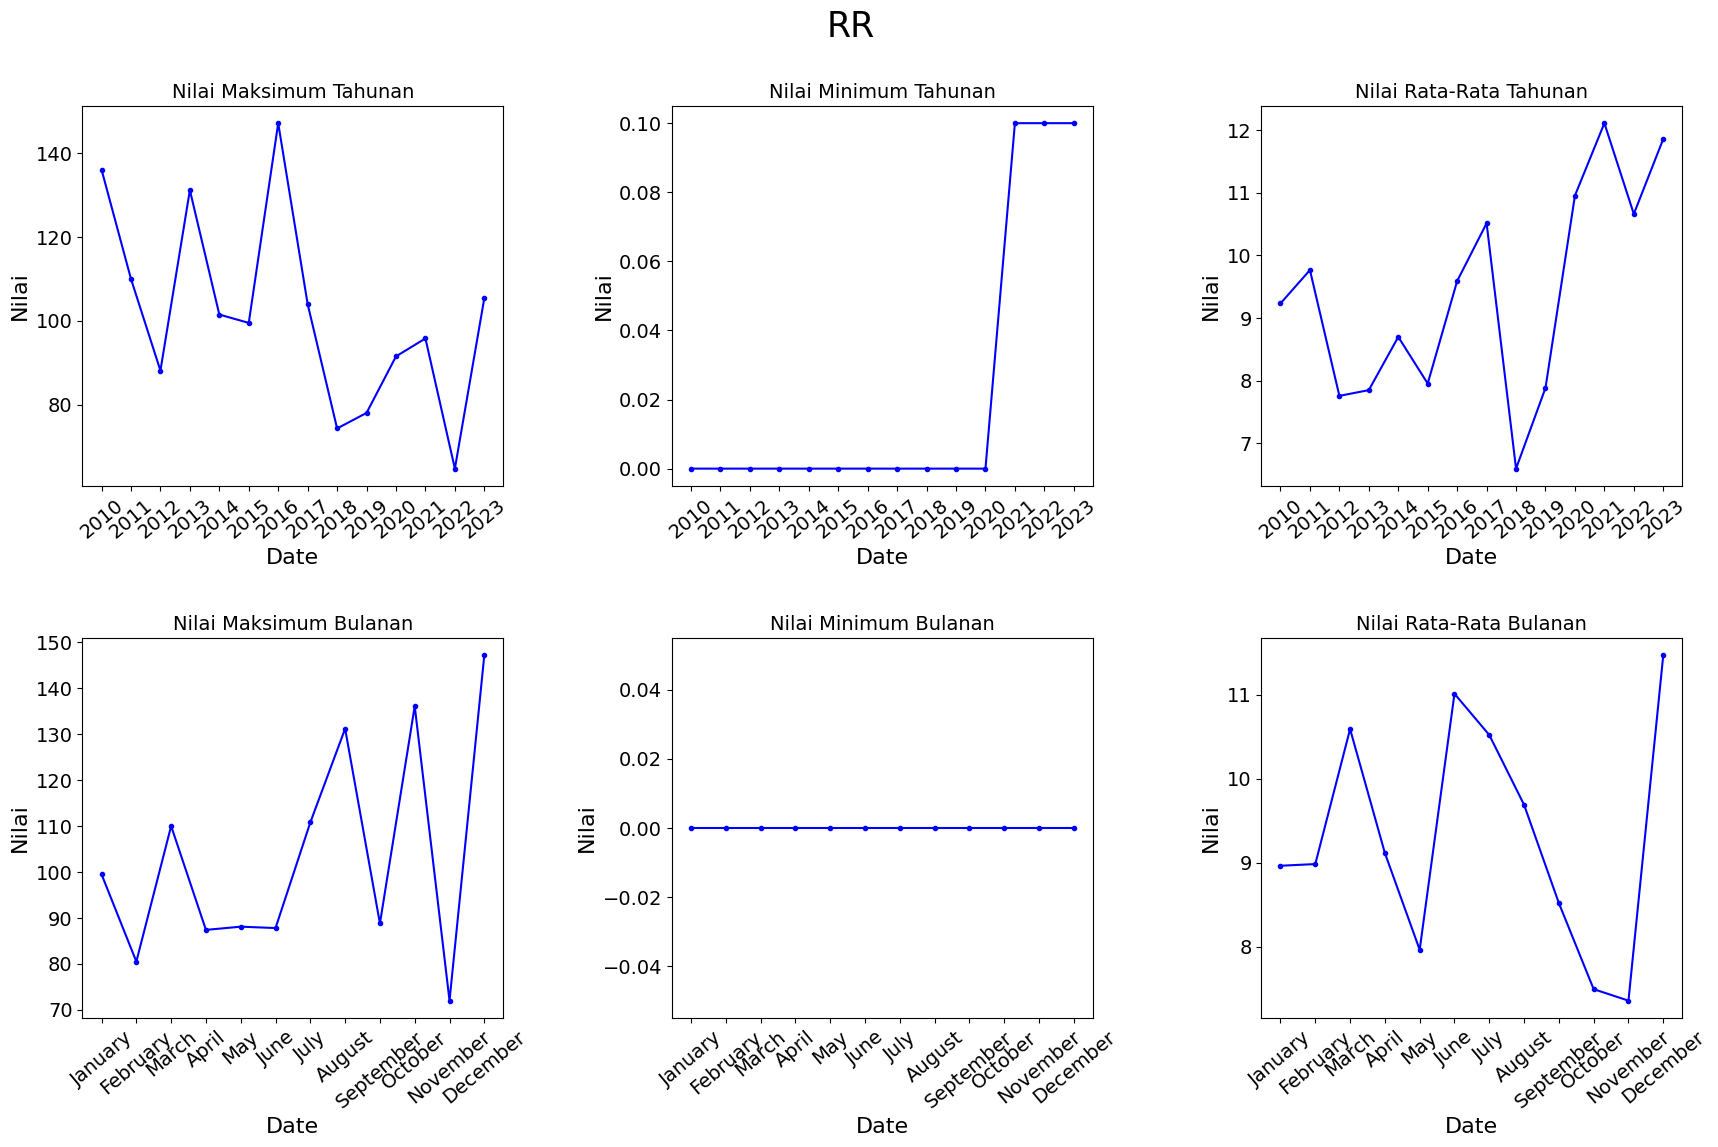

In [ ]:
# Curah Hujan
# Menampilkan plot trend tahunan
var = 'RR'
c = 'blue'
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2.6,
                    top=2,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2, 3, 1)
dfy1 = df.groupby(df.index.year)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Maksimum Tahunan')


plt.subplot(2, 3, 2)
dfy1 = df.groupby(df.index.year)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Minimum Tahunan')


plt.subplot(2, 3, 3)
dfy1 = df.groupby(df.index.year)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Rata-Rata Tahunan')

# Menampilkan plot trend bulanan

plt.subplot(2, 3, 4)
dfy1 = df.groupby(df.index.month)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Maksimum Bulanan')

plt.subplot(2, 3, 5)
dfy1 = df.groupby(df.index.month)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Minimum Bulanan')

plt.subplot(2, 3, 6)
dfy1 = df.groupby(df.index.month)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Rata-Rata Bulanan')
plt.suptitle(var, x=1.3, y=2.2, fontsize=25)
plt.show()

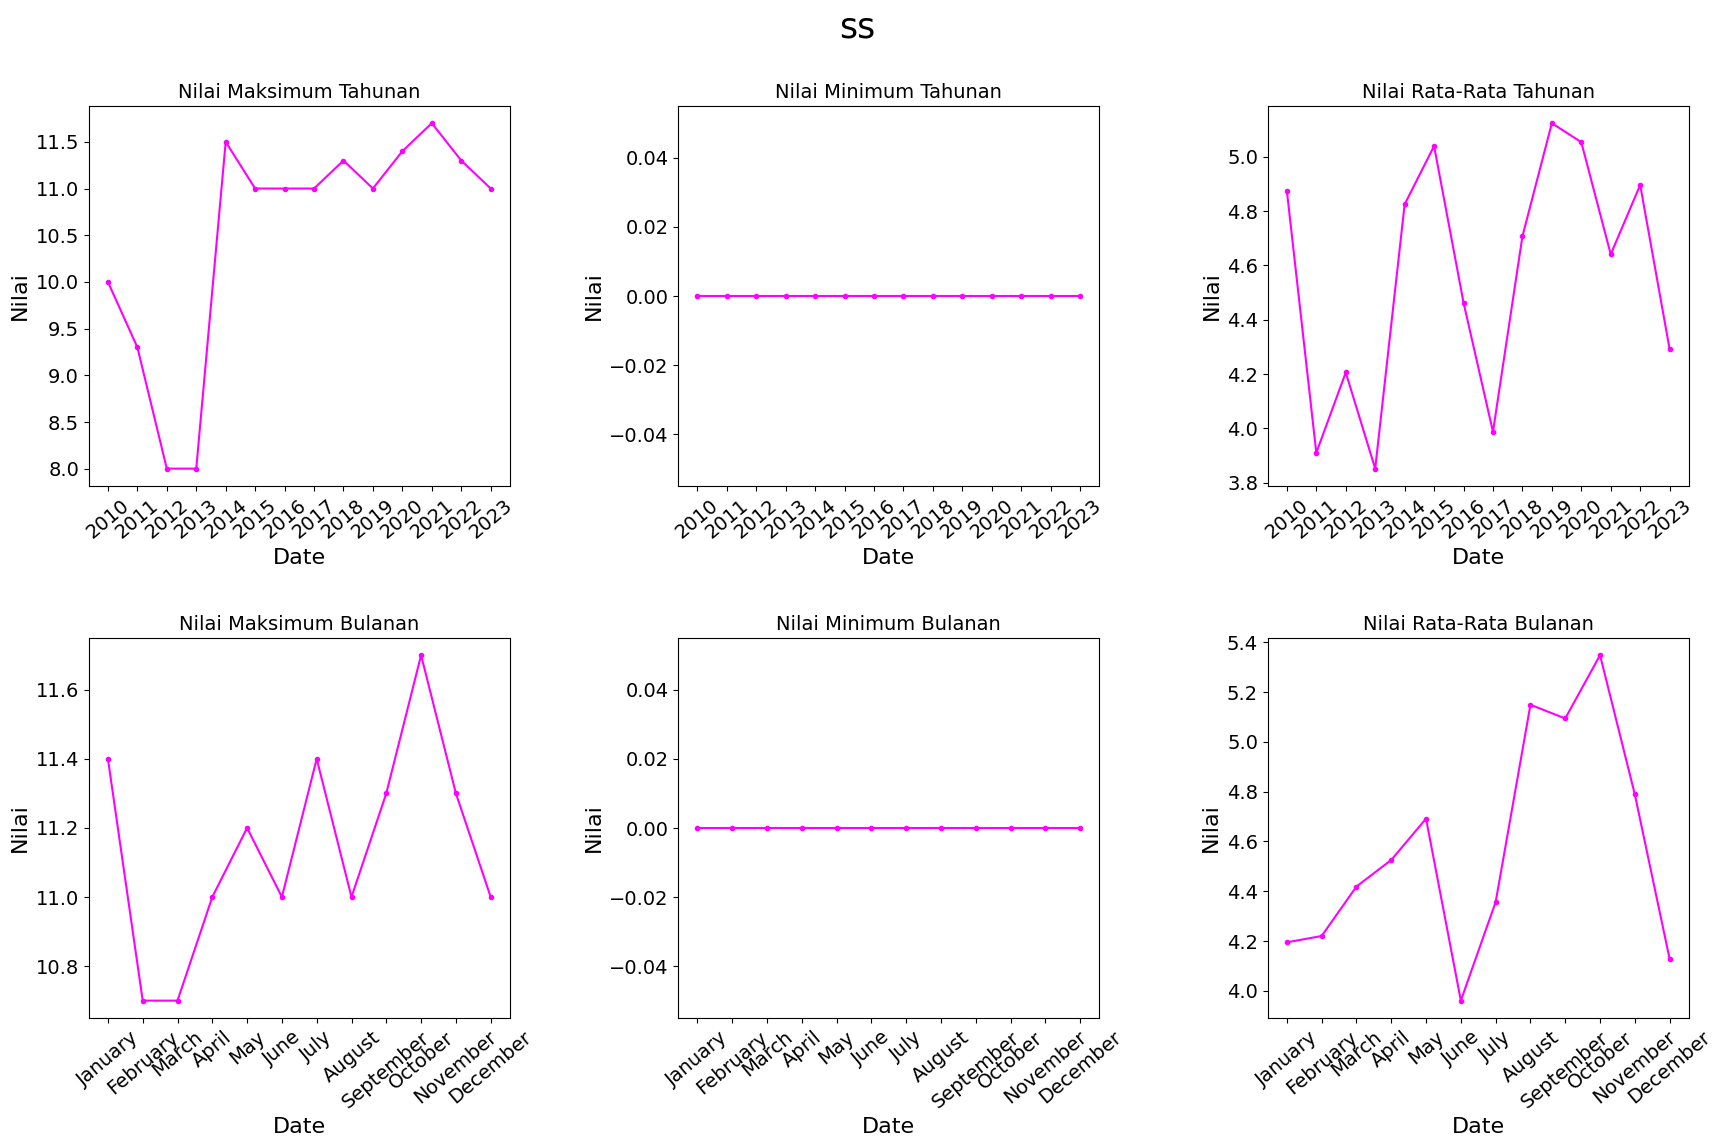

In [ ]:
# Lamanya Penyinaran Matahari
# Menampilkan plot trend tahunan
var = 'ss'
c = 'magenta'
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2.6,
                    top=2,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2, 3, 1)
dfy1 = df.groupby(df.index.year)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Maksimum Tahunan')


plt.subplot(2, 3, 2)
dfy1 = df.groupby(df.index.year)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Minimum Tahunan')


plt.subplot(2, 3, 3)
dfy1 = df.groupby(df.index.year)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Rata-Rata Tahunan')

# Menampilkan plot trend bulanan

plt.subplot(2, 3, 4)
dfy1 = df.groupby(df.index.month)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Maksimum Bulanan')

plt.subplot(2, 3, 5)
dfy1 = df.groupby(df.index.month)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Minimum Bulanan')

plt.subplot(2, 3, 6)
dfy1 = df.groupby(df.index.month)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Rata-Rata Bulanan')
plt.suptitle(var, x=1.3, y=2.2, fontsize=25)
plt.show()

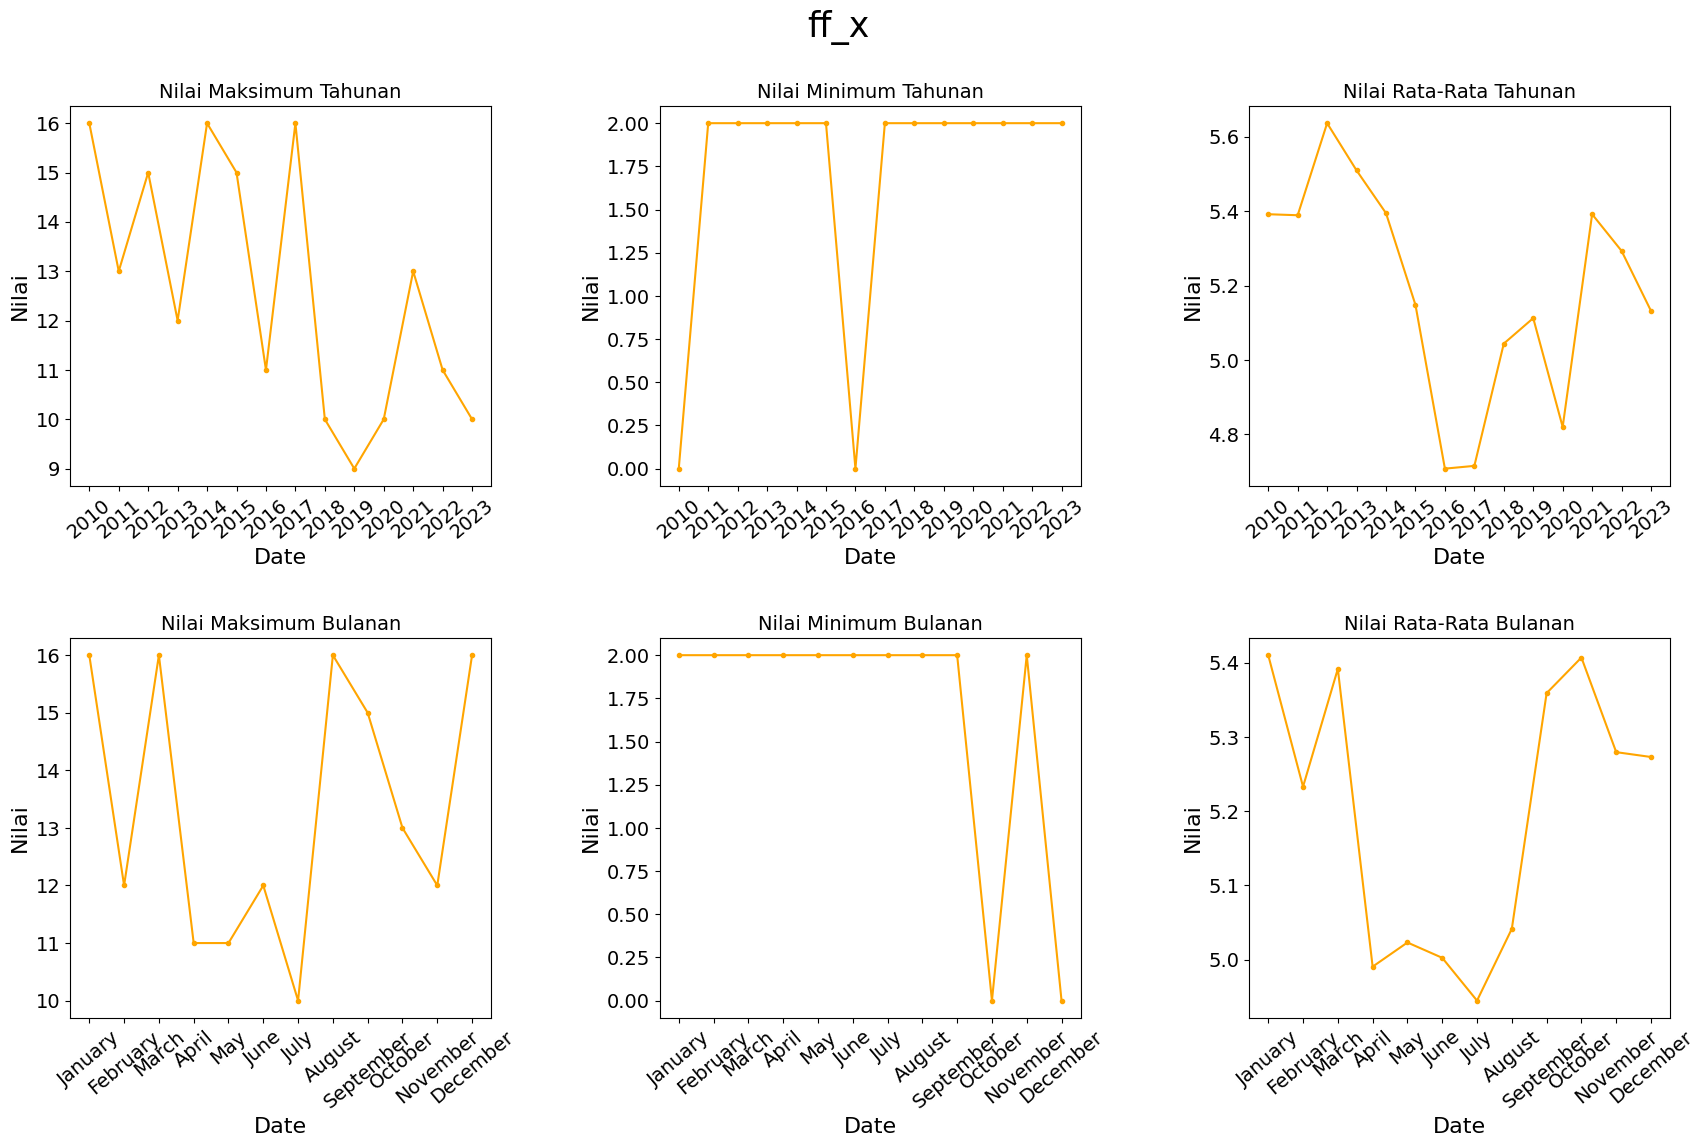

In [ ]:
# Kecepatan Angin Maksimum
# Menampilkan plot trend tahunan
var = 'ff_x'
c = 'orange'
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2.6,
                    top=2,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2, 3, 1)
dfy1 = df.groupby(df.index.year)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Maksimum Tahunan')


plt.subplot(2, 3, 2)
dfy1 = df.groupby(df.index.year)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Minimum Tahunan')


plt.subplot(2, 3, 3)
dfy1 = df.groupby(df.index.year)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Rata-Rata Tahunan')

# Menampilkan plot trend bulanan

plt.subplot(2, 3, 4)
dfy1 = df.groupby(df.index.month)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Maksimum Bulanan')

plt.subplot(2, 3, 5)
dfy1 = df.groupby(df.index.month)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Minimum Bulanan')

plt.subplot(2, 3, 6)
dfy1 = df.groupby(df.index.month)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Rata-Rata Bulanan')
plt.suptitle(var, x=1.3, y=2.2, fontsize=25)
plt.show()

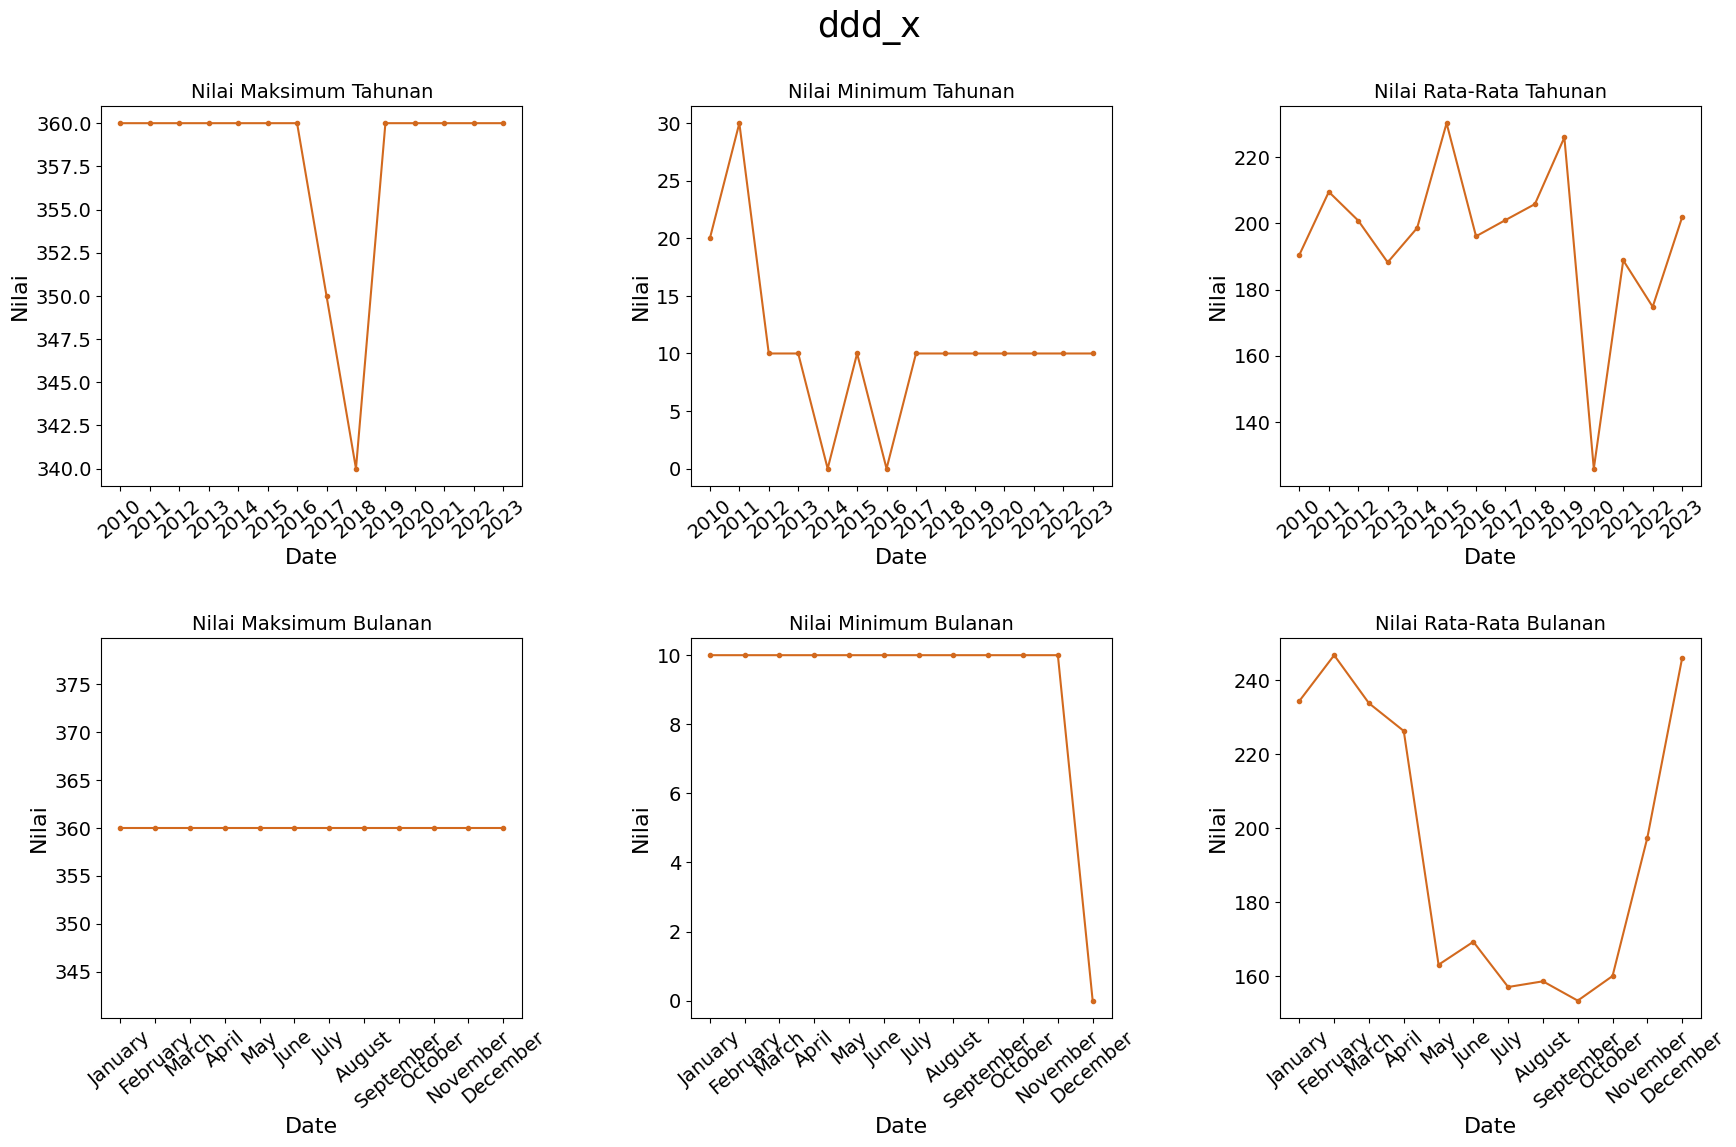

In [ ]:
# Arah Angin Saat Kecepatan Maksimum
# Menampilkan plot trend tahunan
var = 'ddd_x'
c = 'chocolate'
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2.6,
                    top=2,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2, 3, 1)
dfy1 = df.groupby(df.index.year)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Maksimum Tahunan')


plt.subplot(2, 3, 2)
dfy1 = df.groupby(df.index.year)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Minimum Tahunan')


plt.subplot(2, 3, 3)
dfy1 = df.groupby(df.index.year)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Rata-Rata Tahunan')

# Menampilkan plot trend bulanan

plt.subplot(2, 3, 4)
dfy1 = df.groupby(df.index.month)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Maksimum Bulanan')

plt.subplot(2, 3, 5)
dfy1 = df.groupby(df.index.month)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Minimum Bulanan')

plt.subplot(2, 3, 6)
dfy1 = df.groupby(df.index.month)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Rata-Rata Bulanan')
plt.suptitle(var, x=1.3, y=2.2, fontsize=25)
plt.show()

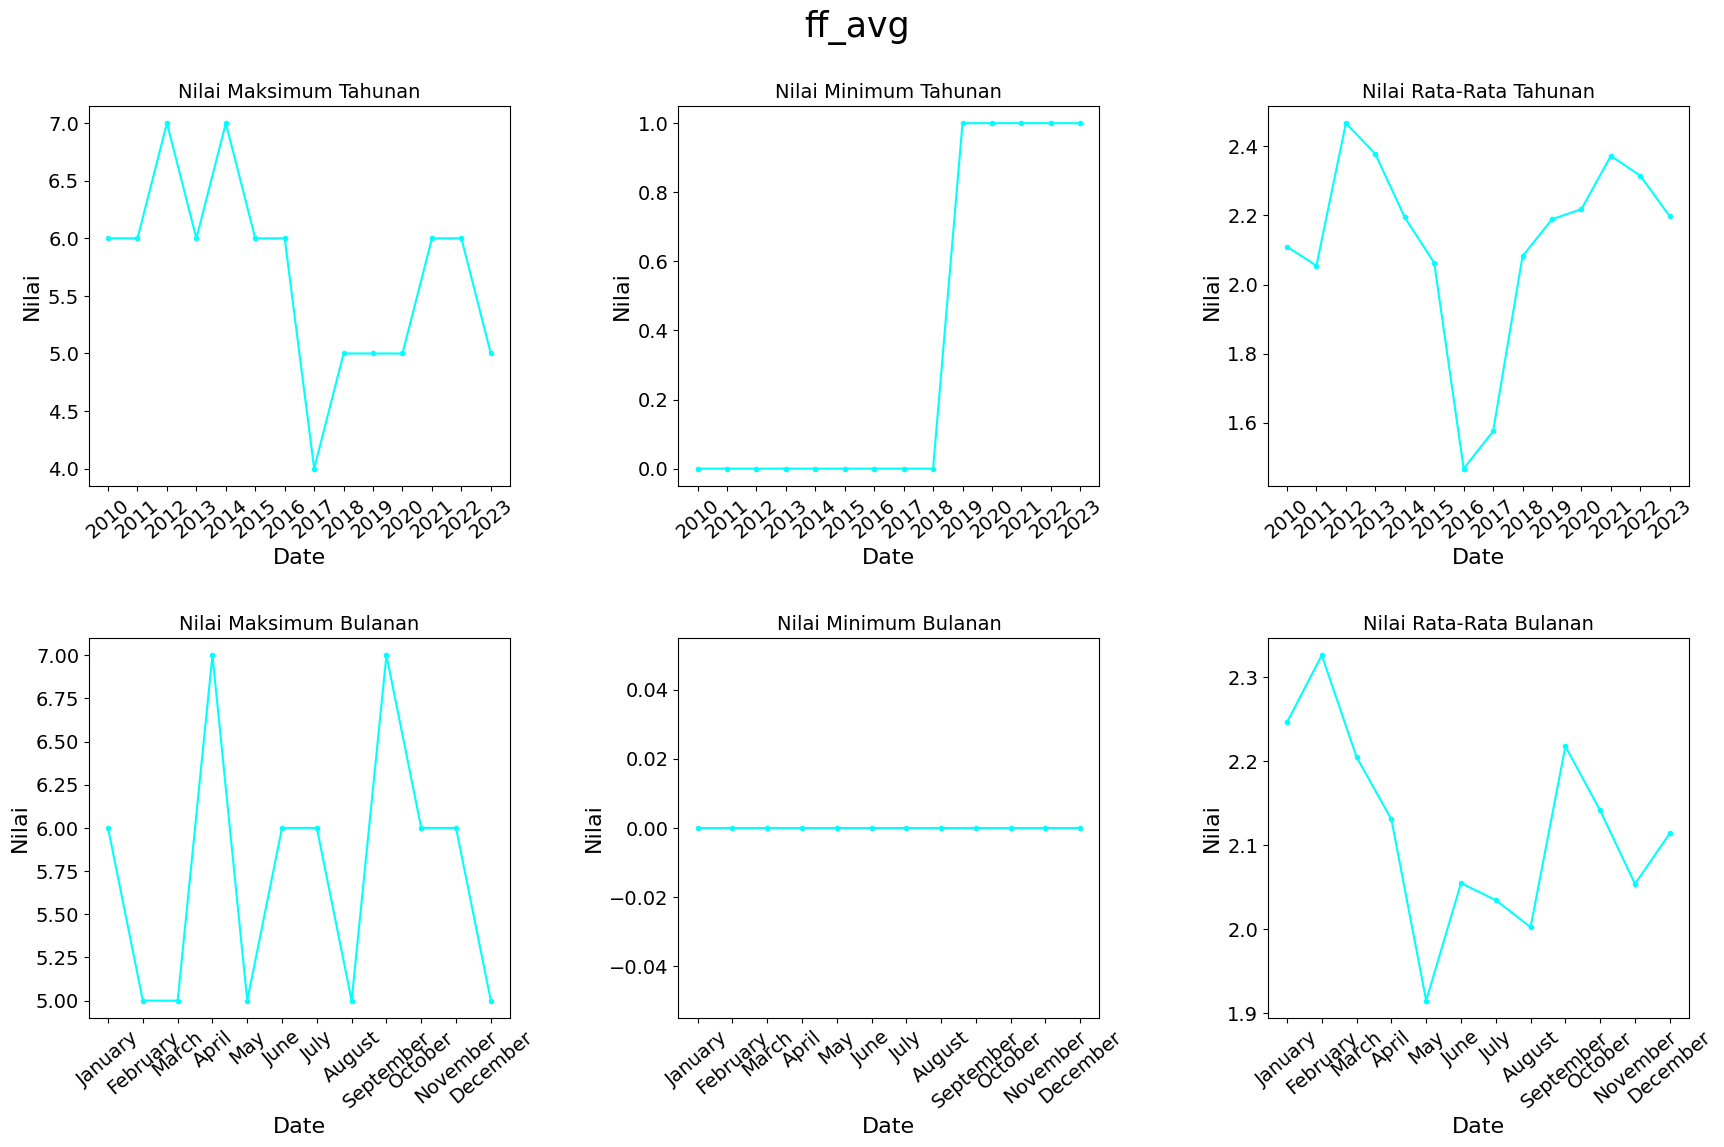

In [ ]:
# Kecepatan Angin Rata-Rata
# Menampilkan plot trend tahunan
var = 'ff_avg'
c = 'cyan'
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2.6,
                    top=2,
                    wspace=0.4,
                    hspace=0.4)
plt.subplot(2, 3, 1)
dfy1 = df.groupby(df.index.year)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Maksimum Tahunan')


plt.subplot(2, 3, 2)
dfy1 = df.groupby(df.index.year)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Minimum Tahunan')


plt.subplot(2, 3, 3)
dfy1 = df.groupby(df.index.year)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], rotation=40)
plt.title('Nilai Rata-Rata Tahunan')

# Menampilkan plot trend bulanan

plt.subplot(2, 3, 4)
dfy1 = df.groupby(df.index.month)[var].max()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Maksimum Bulanan')

plt.subplot(2, 3, 5)
dfy1 = df.groupby(df.index.month)[var].min()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Minimum Bulanan')

plt.subplot(2, 3, 6)
dfy1 = df.groupby(df.index.month)[var].mean()
dfy1.plot(marker = '.', color = c)
plt.ylabel('Nilai')
plt. xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=40)
plt.title('Nilai Rata-Rata Bulanan')
plt.suptitle(var, x=1.3, y=2.2, fontsize=25)
plt.show()